In [3]:
!python3 -m pip install kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report


In [7]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "blastchar/telco-customer-churn",
    file_path,
)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df = df.dropna()

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

df = df.drop(columns=["customerID"])

categorical_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df.drop("Churn", axis=1)
y = df["Churn"]


/var/folders/r_/zhk06phn5rg0kd9cv4qb47140000gn/T/ipykernel_8782/4007640829.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


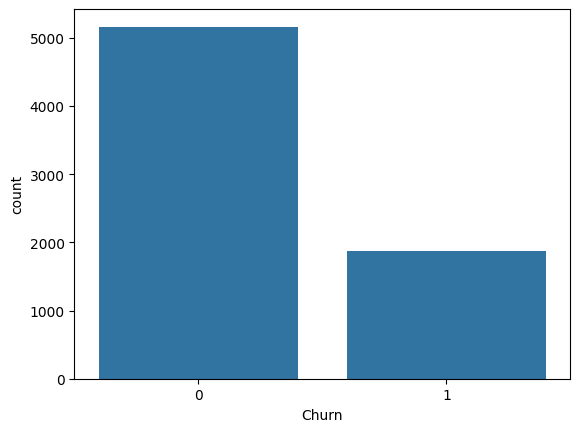

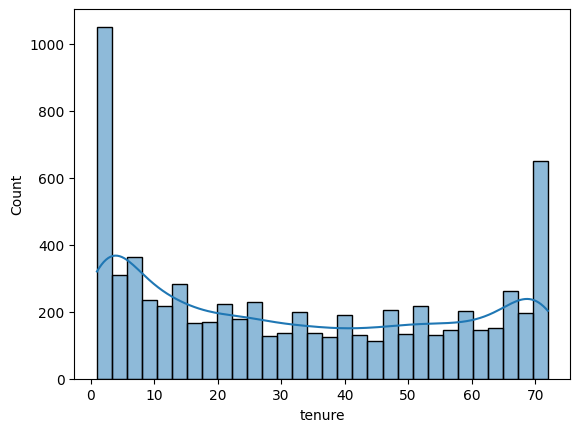

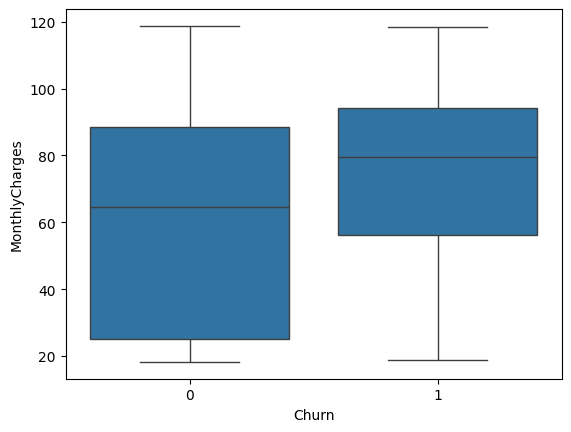

Churn                             1.000000
InternetService_Fiber optic       0.307463
PaymentMethod_Electronic check    0.301455
MonthlyCharges                    0.192858
PaperlessBilling_Yes              0.191454
SeniorCitizen                     0.150541
StreamingTV_Yes                   0.063254
StreamingMovies_Yes               0.060860
MultipleLines_Yes                 0.040033
PhoneService_Yes                  0.011691
Name: Churn, dtype: float64

In [8]:
df["Churn"].value_counts(normalize=True)

sns.countplot(x="Churn", data=df)
plt.show()

sns.histplot(df["tenure"], bins=30, kde=True)
plt.show()

sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.show()

contract_cols = [col for col in df.columns if "Contract_" in col]
churn_by_contract = df.groupby("Churn")[contract_cols].mean()
churn_by_contract

corr = df.corr()
top_corr = corr["Churn"].sort_values(ascending=False).head(10)
top_corr


In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)

y_pred_baseline = baseline_model.predict(X_val_scaled)


In [13]:
print("Baseline Model")
print(classification_report(y_val, y_pred_baseline))


Baseline Model
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [14]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)


In [16]:
print("Improved Model")
print(classification_report(y_val, y_pred_rf))

Improved Model
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



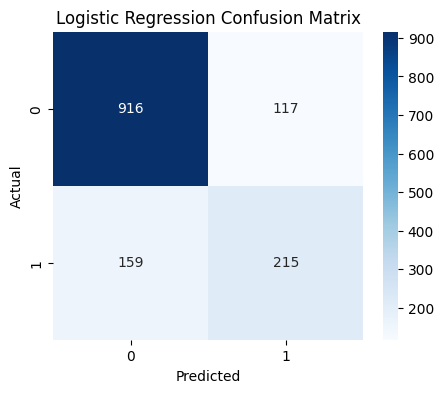

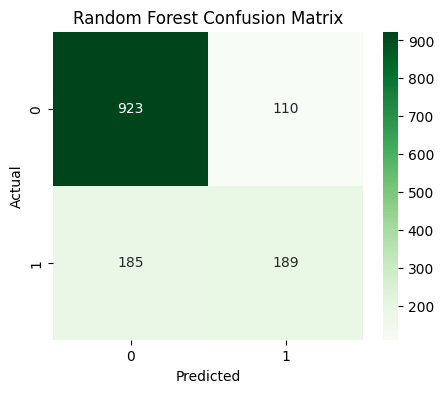

In [17]:
baseline_cm = confusion_matrix(y_val, y_pred_baseline)
rf_cm = confusion_matrix(y_val, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(baseline_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
